1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


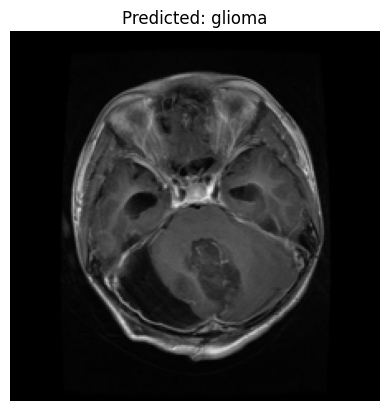

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import requests
from io import BytesIO
from PIL import Image

label_mapping = {
    0: "glioma",
    1: "meningioma",
    2: "notumor",
    3: "pituitary"
}

def get_label_from_prediction(predicted_index, label_mapping):
    return label_mapping.get(predicted_index, "Unknown")

def visualize_predictions(model, test_gen, num_images=5):
    images, true_labels = next(test_gen)

    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(true_labels, axis=1)

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        predicted_label = get_label_from_prediction(predicted_labels[i], label_mapping)
        true_label = get_label_from_prediction(true_labels[i], label_mapping)
        plt.title(f"True: {true_label}, Pred: {predicted_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def visualize_prediction_from_image(model, img_path=None, img_url=None):
    if img_url:
        response = requests.get(img_url)
        img = Image.open(BytesIO(response.content))
    elif img_path:
        img = Image.open(img_path)
    else:
        print("Please provide an image path or URL.")
        return

    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_label_index = np.argmax(prediction, axis=1)[0]
    predicted_label = get_label_from_prediction(predicted_label_index, label_mapping)

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

model = load_model("my_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


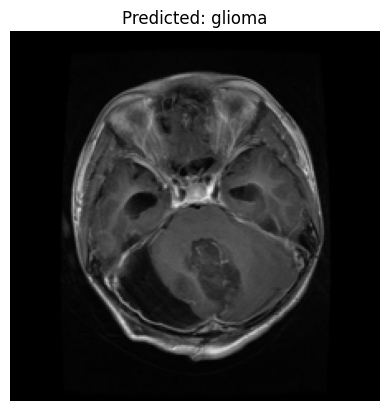

: 

In [5]:

visualize_prediction_from_image(model, img_path="test.jpg", img_url=None)